In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1

In [2]:
def fourier(x, n):
    res = 1/4
    for i in range(1, n):
        res += (2/(i*np.pi)*(np.sin(i*np.pi/4)))*np.cos(i*x)
    return res

In [3]:
def f(x):
    if -np.pi/4 <= x and x <= np.pi/4:
        return 1
    else:
        return 0

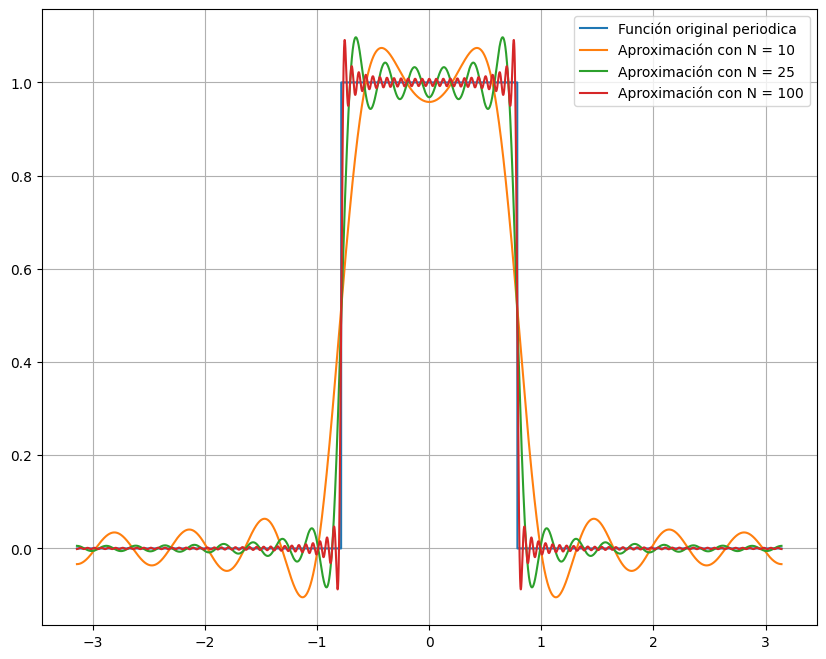

In [4]:
x = np.linspace(-np.pi, np.pi, 10000)
y = [f(i) for i in x]

plt.figure(figsize=(10,8))
plt.grid()
plt.plot(x, y)
plt.plot(x, fourier(x,10))
plt.plot(x, fourier(x,25))
plt.plot(x, fourier(x,100))
plt.legend(["Función original periodica", "Aproximación con N = 10", "Aproximación con N = 25", "Aproximación con N = 100"])

Se observa el fenomeno de Gibbs es los puntos de discontinuidad, -1 y 1. Se ven ademas que aunque vaya aumentando el N bastante, la altura de los picos no baja, de hecho algunos suben y parecen ir estableciendose de a poco en una altura fija.

In [5]:
def sumatoria(n):
    res = 0
    for i in range(1, n):
        res += (2/(i*np.pi)*(np.sin(i*np.pi/4)))**2
    return res

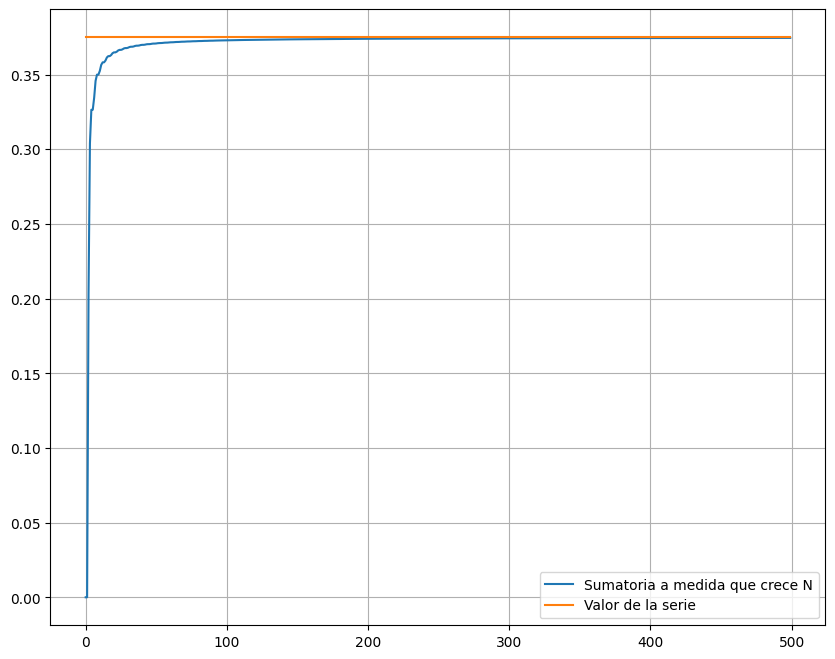

In [6]:
N = np.arange(0, 500)
s = [sumatoria(i) for i in N]
plt.figure(figsize=(10,8))
plt.grid()
plt.plot(N,s)
plt.plot(N, [0.375]*len(N))
plt.legend(["Sumatoria a medida que crece N", "Valor de la serie"])

In [7]:
i = -1
e = 1
while e > 10**(-2):
    i += 1
    e = 0.375-sumatoria(i)
i

22

Con $N = 22$ es la primera vez que el error es menor a $10^{-2}$.

## Ejercicio 2

In [8]:
def shannon(x, tsampled, tsmooth):
    x_sinc = np.zeros(len(tsmooth))
    dt = tsampled[1] - tsampled[0]

    for n in range(0, len(tsampled)):
        x_sinc += x[n] * np.sinc((tsmooth-tsampled[n])/dt)
    
    return x_sinc

In [9]:
def sinc(x):
    return np.sin(x)/x

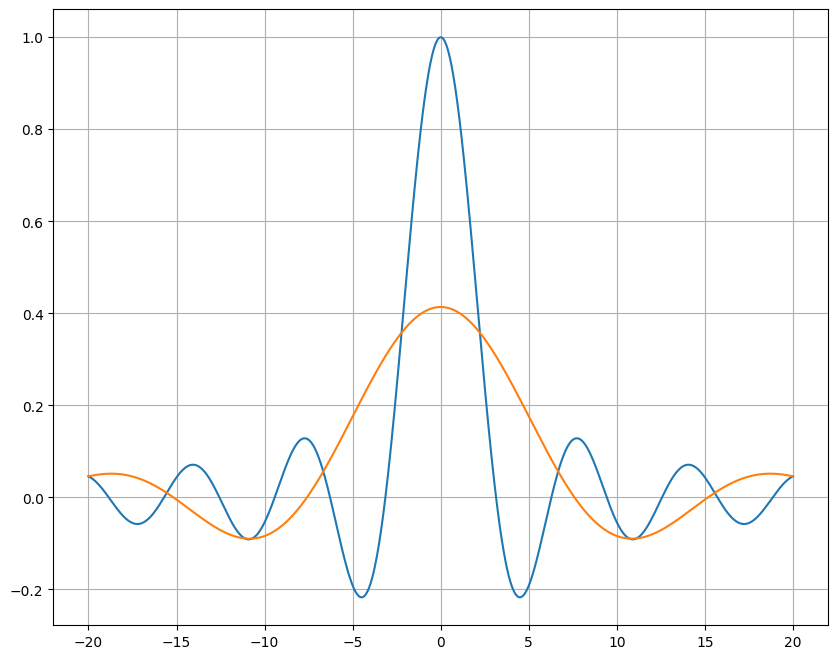

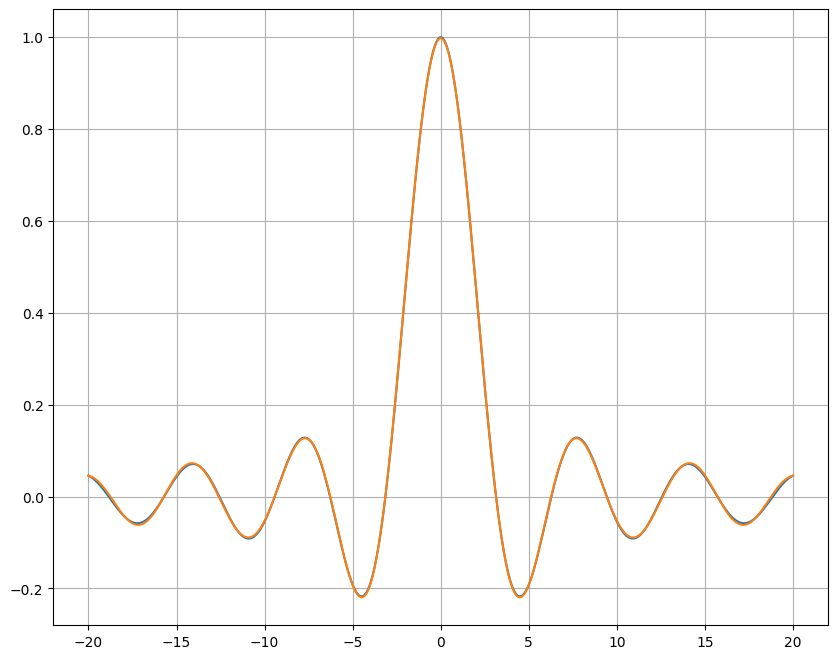

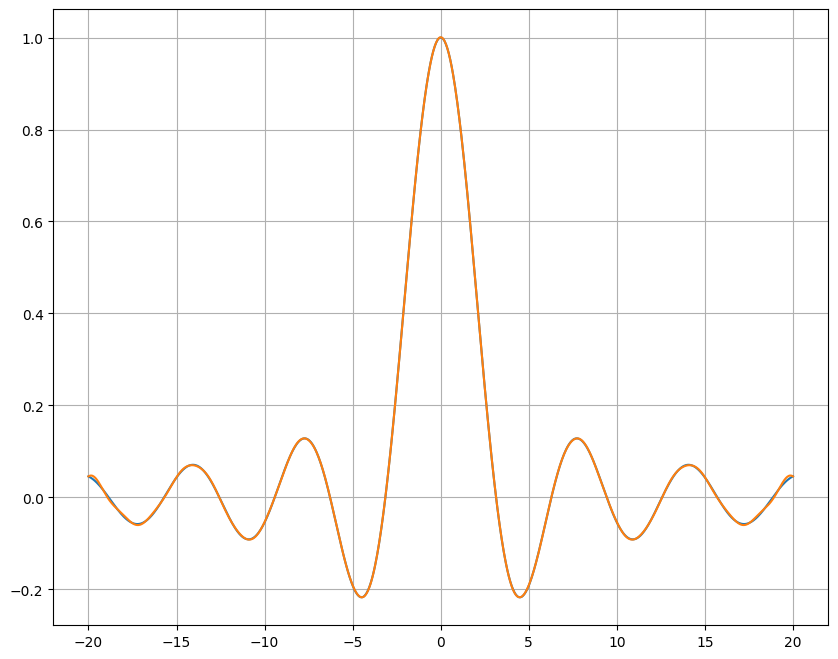

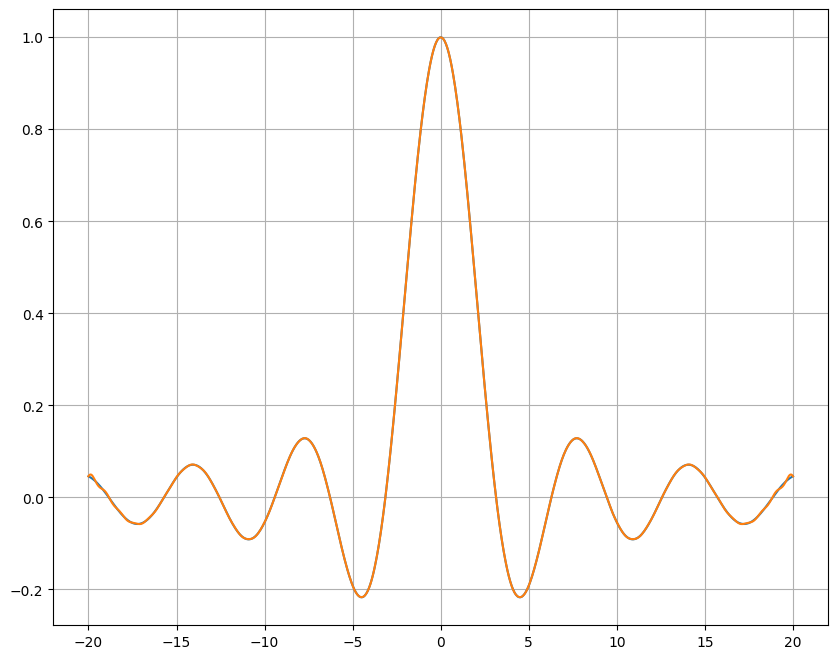

In [10]:
tsuave = np.linspace(-20,20,1000)

y_suave = sinc(tsuave)

for i in [10,20,50,100]:

    tnosuave = np.linspace(-20,20,i)
    y_nosuave = sinc(tnosuave)

    y_reconstruido = shannon(y_nosuave, tnosuave, tsuave)

    plt.figure(figsize=(10,8))
    plt.grid()
    plt.plot(tsuave, y_suave)
    plt.plot(tsuave, y_reconstruido)

Teniendo en cuenta que la funcion sinc(x) tiene ancho de banda 1, entonces necesito que la Fs sea dos veces el largo del intervalo que estoy tomando. A partir de tomar 100 puntos se puede ver como la aproximacion mejora, deberia ser perfecta la reconstrucción, pero hay algun problema que genera que tenga un minimo error.

In [11]:
def exp(x, a):
    return (np.exp(-(x**2)/(a**2)))/(np.sqrt(2*np.pi)*a)

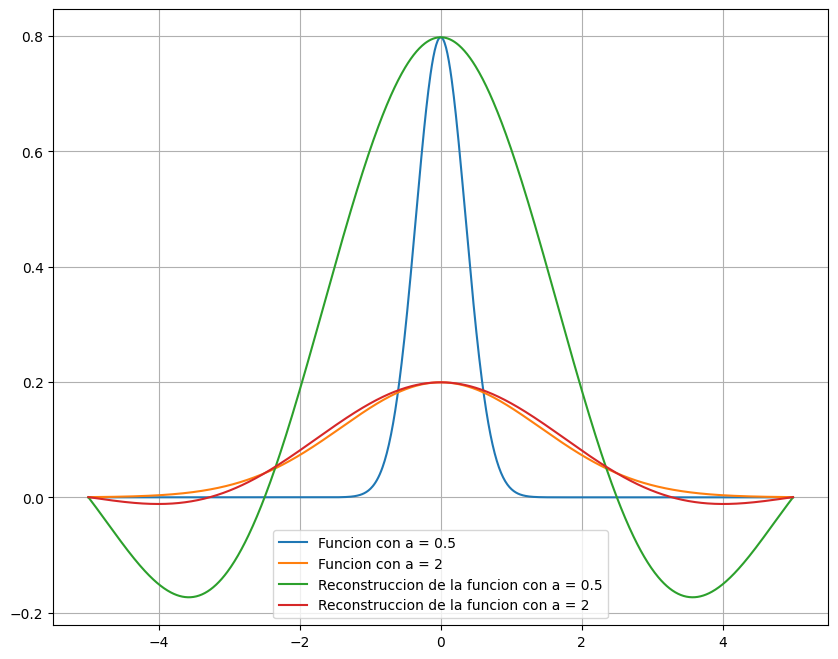

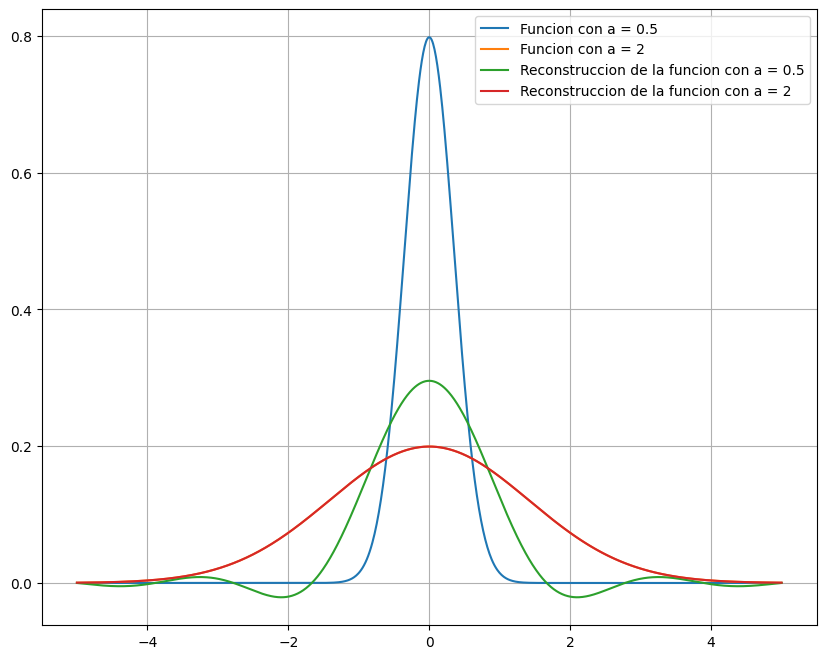

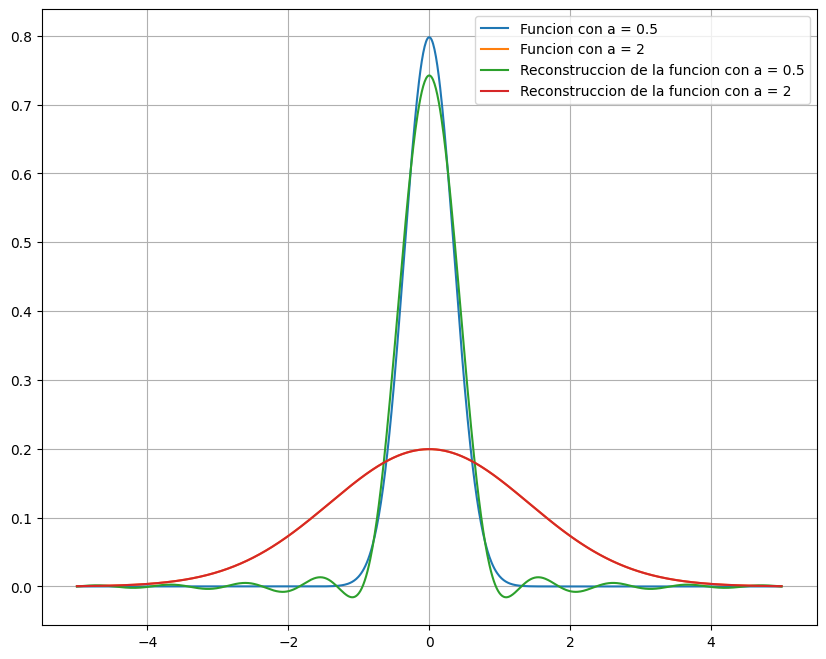

In [12]:
tsuave = np.linspace(-5,5,1000)

y1_suave = exp(tsuave, 0.5)
y2_suave = exp(tsuave, 2)

for i in [5,10,20]:

    tnosuave = np.linspace(-5,5,i)
    y1_nosuave = exp(tnosuave, 0.5)
    y2_nosuave = exp(tnosuave, 2)

    y1_reconstruido = shannon(y1_nosuave, tnosuave, tsuave)
    y2_reconstruido = shannon(y2_nosuave, tnosuave, tsuave)

    plt.figure(figsize=(10,8))
    plt.grid()
    plt.plot(tsuave, y1_suave)
    plt.plot(tsuave, y2_suave)
    plt.plot(tsuave, y1_reconstruido)
    plt.plot(tsuave, y2_reconstruido)

    plt.legend(["Funcion con a = 0.5", "Funcion con a = 2", "Reconstruccion de la funcion con a = 0.5", "Reconstruccion de la funcion con a = 2"])

Mi hipotesis me decia que la funcion que tenga el $a$ mas grande iba a tener el ancho de banda mas acotado, entonces quiere decir y como se ve en estos graficos, que la convergencia a medida que voy tomando mas puntos se da de manera mas rapida. Se ve como en el segundo grafico la aproximación de la funcion que tiene $a=2$ es practicamente perfecto, mientras que el de $a=0.5$ le cuesta un poco mas.

## Ejercicio 3

In [32]:
def u(x,t,N):
    res = 5*np.exp(-t*(4*np.pi)**2)*np.sin(4*np.pi*x)-3*np.exp(-t*(8*np.pi)**2)*np.sin(8*np.pi*x)

    #for k in range(1,N):
    #    res += (50/k)*(1-((-1)**k))/np.pi*np.sin(x*k*np.pi/3)*np.exp(-t*(k*np.pi/3)**2)
        
    return res

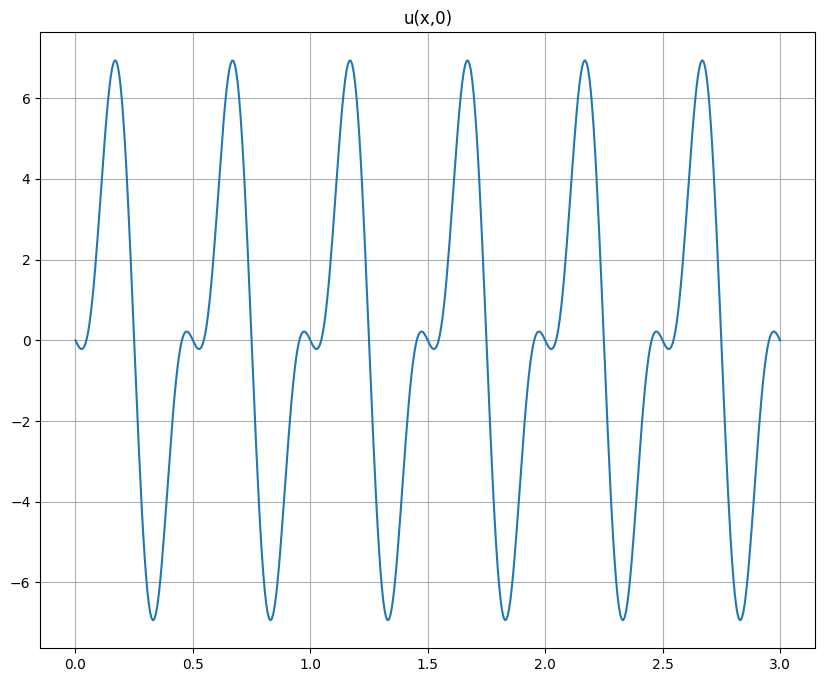

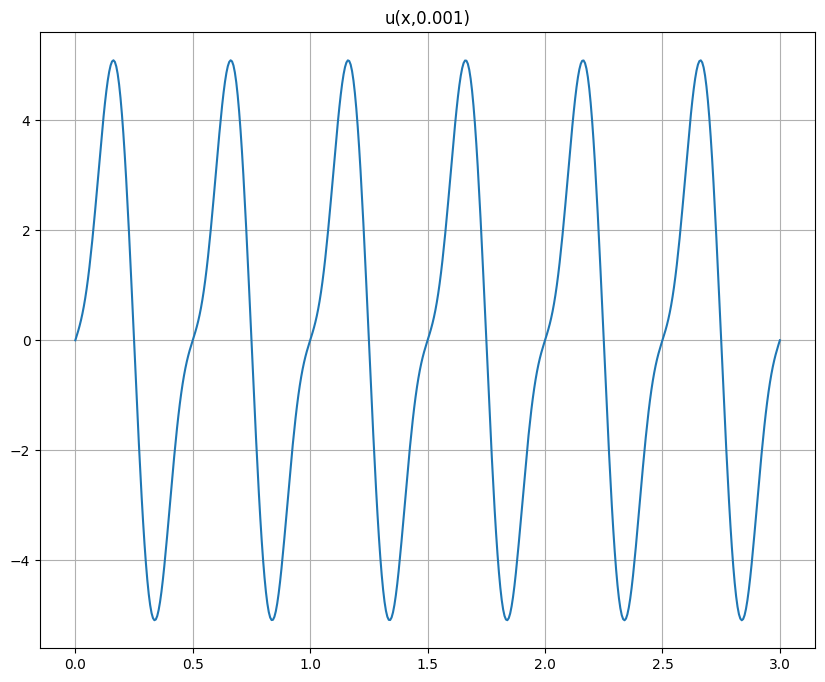

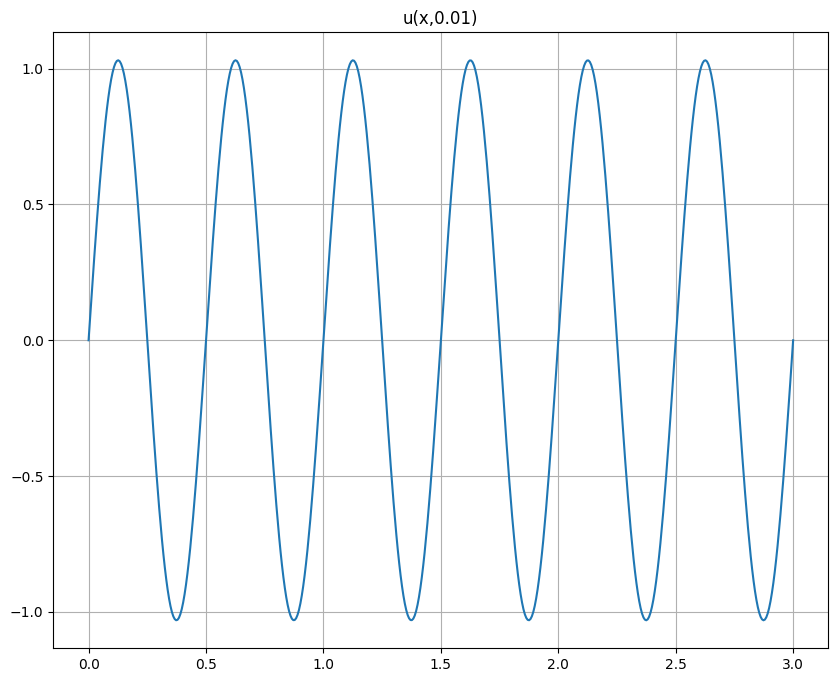

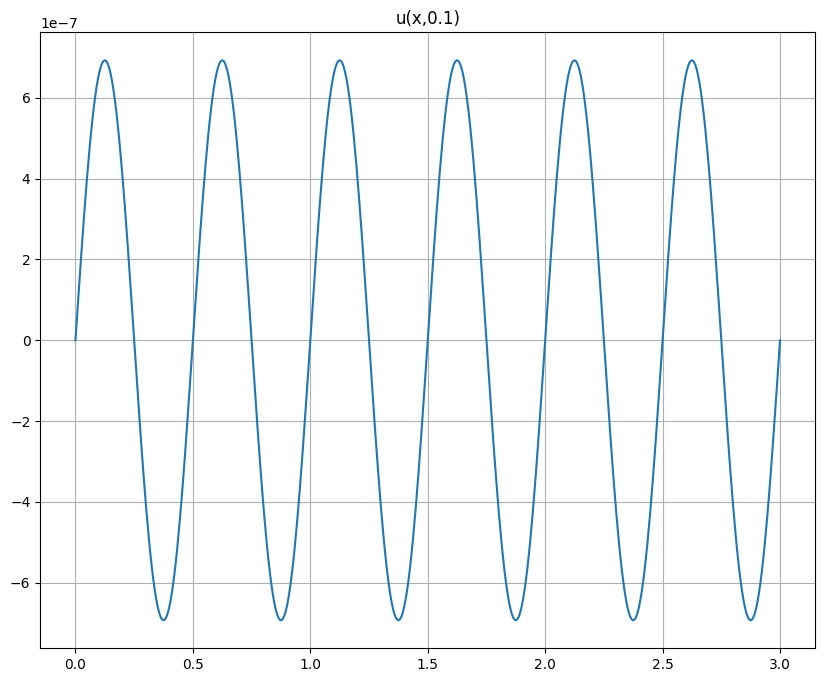

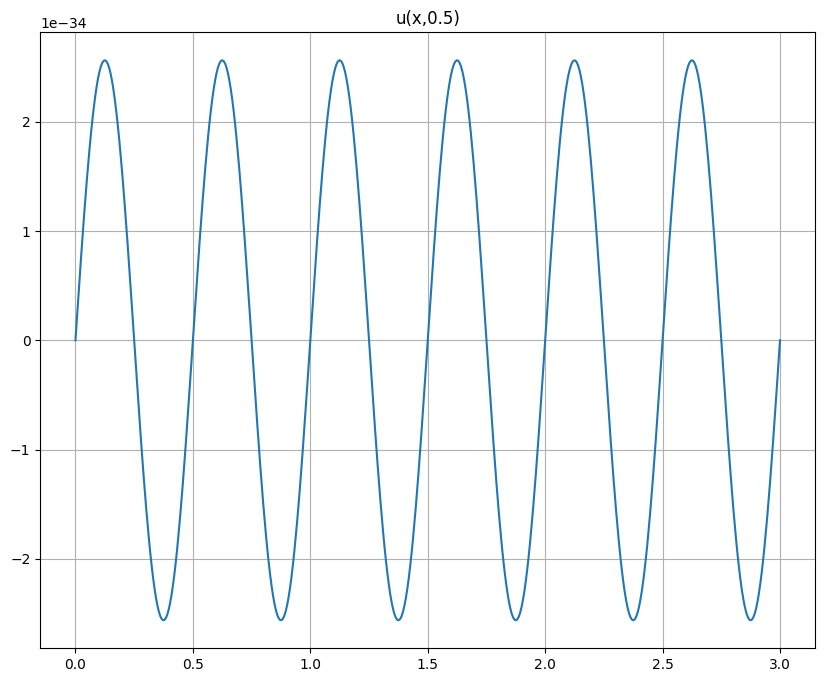

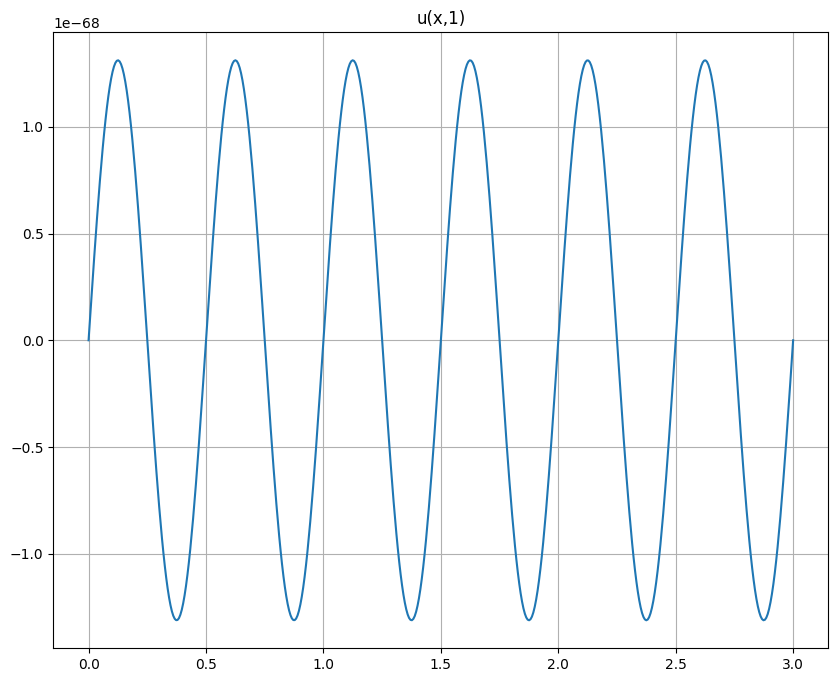

In [33]:
x = np.linspace(0,3,500)
N = 1000

for t in [0, 0.001, 0.01, 0.1, 0.5, 1]:
    plt.figure(figsize=(10,8))
    plt.grid()
    plt.plot(x,u(x,t,N))
    plt.title("u(x," +str(t)+ ")")

Salvo alguna constante sumando (que no me doy cuenta donde esta) que esta haciendo que el grafico se mueva todo hacia arriba se puede ver como se mantiene oscilando a medida que va creciendo el tiempo, hasta que en un momento va predominando uno de los senos y eso hace que tenga un comportamiento de una unica frecuencia. Se puede ver que todo el tiempo se mantienen las condiciones de contorno, y se va moviendo alrededor oscilando. 